# Finding Heavy Traffic Indicators on I-94

dataset
- westbound traffic on the I-94 interstate highway

project goal
- determine a few indicators of heavy traffic
- e.g., weather type, time of day, time of week

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

## 1. The I-94 Traffic Dataset

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic[:5]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic[-5:]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### Observations
- `temp` units? min=0, max=310, mean=281
- `rain_1h` units? max=9,831 inches? ≈819 feet?
- `date_time` in dt format, but dtype=object

- 9 columns
- ~48,200 entries
- 1 column with most data missing:`holiday`
- 5 cols numeric (float/int)
- 4 cols object

## 2. analyzing traffic volume

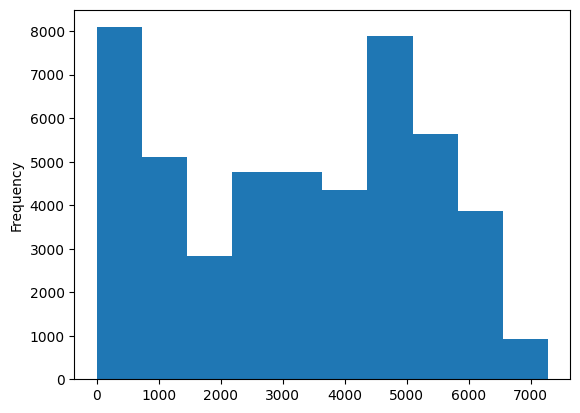

In [7]:
#  traffic volume distribution

traffic['traffic_volume'].plot.hist()
plt.show()

In [8]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

#### Observations
- min=0? perhaps no traffic volume on a particular stretch of I-94
- max=7280 
- 25% = 1193
- 75% = 4933

## 3. traffic volume: day vs. night

In [9]:
# divide dataset in two parts: (1) daytime–7am-7pm, (2) nightime-7pm-7am

traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['date_time'][:5]

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [10]:
date_time_series = traffic['date_time'].dt.hour
date_time_series[:10]

0     9
1    10
2    11
3    12
4    13
5    14
6    15
7    16
8    17
9    18
Name: date_time, dtype: int32

In [11]:
day = traffic.copy()[(traffic['date_time'].dt.hour >=7) & (traffic['date_time'].dt.hour <19)]
day.shape
# day[:5]
# day.describe()

(23877, 9)

In [12]:
night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
night.shape
# nightime[:5]
# nightime.describe()

(24327, 9)

In [13]:
night[:5]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,NaN,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,NaN,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,NaN,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,NaN,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,NaN,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


## 4. traffic volume: day vs. night (part 2)

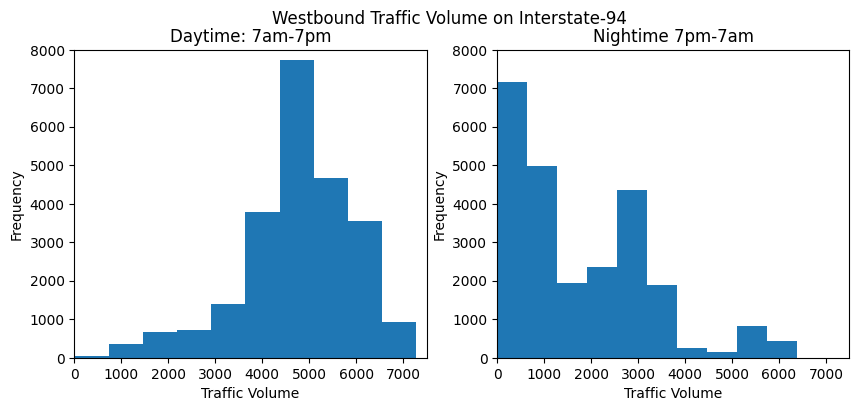

In [14]:
# plot histograms of day and night traffic_volume

plt.figure(figsize=(10,4))

plt.suptitle('Westbound Traffic Volume on Interstate-94')

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Daytime: 7am-7pm')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,7500])
plt.ylim([0,8000])

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Nightime 7pm-7am')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,7500])
plt.ylim([0,8000])

plt.show()

In [15]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

#### Observations
- day histogram in left-skewed, night histogram is right-skewed
- histograms show less traffic volume at night compared to day
- ~50/50 split between day and night entries
- 50% for day is 3.7 times that of 50% for night
- night traffic volume unlikely indicator of heavy traffic

## 5. time indicators

In [17]:
# groupby month and calculate mean by month

day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

In [18]:
by_month[:5]

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609


In [19]:
by_month.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume'], dtype='object')

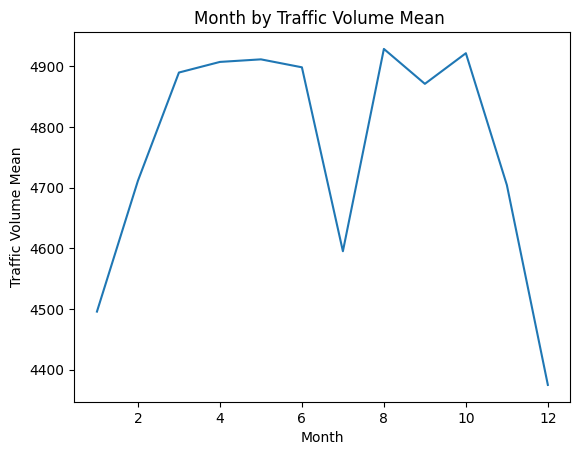

In [20]:
# line plot month by traffic volume mean

# plt.plot(by_month.index, by_month['traffic_volume'])

by_month['traffic_volume'].plot.line()
plt.title('Month by Traffic Volume Mean ')
plt.xlabel('Month')
plt.ylabel('Traffic Volume Mean')
plt.show()

#### Observations
- Jan-Feb, Jul, and Nov-Dec have lower mean traffic volume
- Why is Jul low? Summer vacations not in cars?
- peaks are Aug and Oct
- steady high volume Mar-Jun

## 6. time indicators (part 2)

In [21]:
# group by day of the week
# 0=Monday, 6=Sunday

day['day_of_week'] = day['date_time'].dt.dayofweek
by_day_of_week = day.groupby('day_of_week').mean(numeric_only=True)
by_day_of_week['traffic_volume'] 

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

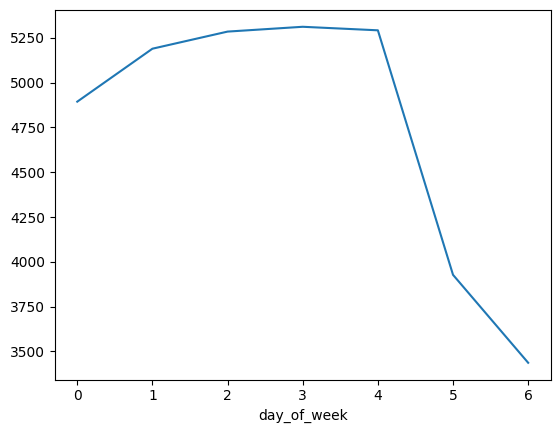

In [23]:
# by_month['traffic_volume'].plot.line()
# line plot for day of the week

by_day_of_week['traffic_volume'].plot.line()
plt.show()


#### Observations
- traffic is higher Mon-Fri; the typical work and school days. 
- traffic is second lowest on Sat; less people going to work and school.  
- traffic is lowest on Sun, perhaps people more at home preparing for the week ahead. 